<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset -f

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
#from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer # For Imputation of Missing Data
from sklearn.model_selection import StratifiedKFold
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets

In [3]:
import warnings
warnings.filterwarnings("ignore") # Ignore the warnings

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:

df=pd.read_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/aiways_mod.csv')
df.head()
df.describe()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22.0,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55.0,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59.0,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48.0,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51.0,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
count,937.000000,945.000000,945.000000,945.000000,945.000000,939.000000,941.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,43.540021,162.225397,0.213757,0.104762,0.258201,0.173589,25.698778,16.928677,8.156190,1.889947,0.010582,1.824339
std,11.806070,16.130197,0.505081,0.306409,0.442689,0.378957,21.101083,1.596491,2.295105,0.692388,0.102377,0.721081
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.500000,1.400000,1.000000,0.000000,1.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.300000,16.000000,7.500000,1.000000,0.000000,1.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.000000,0.000000,2.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.600000,18.000000,8.600000,2.000000,0.000000,2.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,243.000000,22.000000,72.000000,4.000000,1.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       937 non-null    float64
 1   sex                       945 non-null    object 
 2   height                    945 non-null    int64  
 3   subluxation of mandible   945 non-null    int64  
 4   head and neck movement    945 non-null    int64  
 5   buck teeth                945 non-null    int64  
 6   edentulous                939 non-null    float64
 7   bmi                       941 non-null    float64
 8   sternomental distance     945 non-null    float64
 9   thyromental distance      945 non-null    float64
 10  mallampatti               945 non-null    int64  
 11  mouth opening             945 non-null    int64  
 12  cormack lahane            945 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 96.1+ KB


In [7]:
print(df.columns)  # Check actual column names
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
# In col names keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

Index(['age', 'sex', 'height', 'subluxation of mandible ',
       'head and neck movement ', 'buck teeth', 'edentulous', 'bmi',
       'sternomental distance', 'thyromental distance', 'mallampatti',
       'mouth opening', 'cormack lahane'],
      dtype='object')


,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22.0,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55.0,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59.0,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48.0,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51.0,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


In [8]:
df['sex'].value_counts()
mappings = {
    'female': 0,
    'male': 1
}

df['sex'] = df['sex'].map(mappings)
df['sex'].value_counts()


,count
sex,
female,509
male,436


,count
sex,
0,509
1,436


In [9]:

# Select categorical and numerical columns
df_cat = df[['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement', 'cormack lahane']]
df_noncat = df[["age", "height", "bmi", "sternomental distance", "thyromental distance"]]
df_cat.nunique()
df_cat.head()


,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2
cormack lahane,4


,sex,buck teeth,edentulous,mallampatti,mouth opening,subluxation of mandible,head and neck movement,cormack lahane
0,1,1,0.0,2,0,1,0,2
1,0,1,0.0,2,0,1,0,1
2,1,0,1.0,3,0,2,1,3
3,0,0,0.0,3,0,1,0,2
4,0,0,1.0,4,1,3,0,4


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

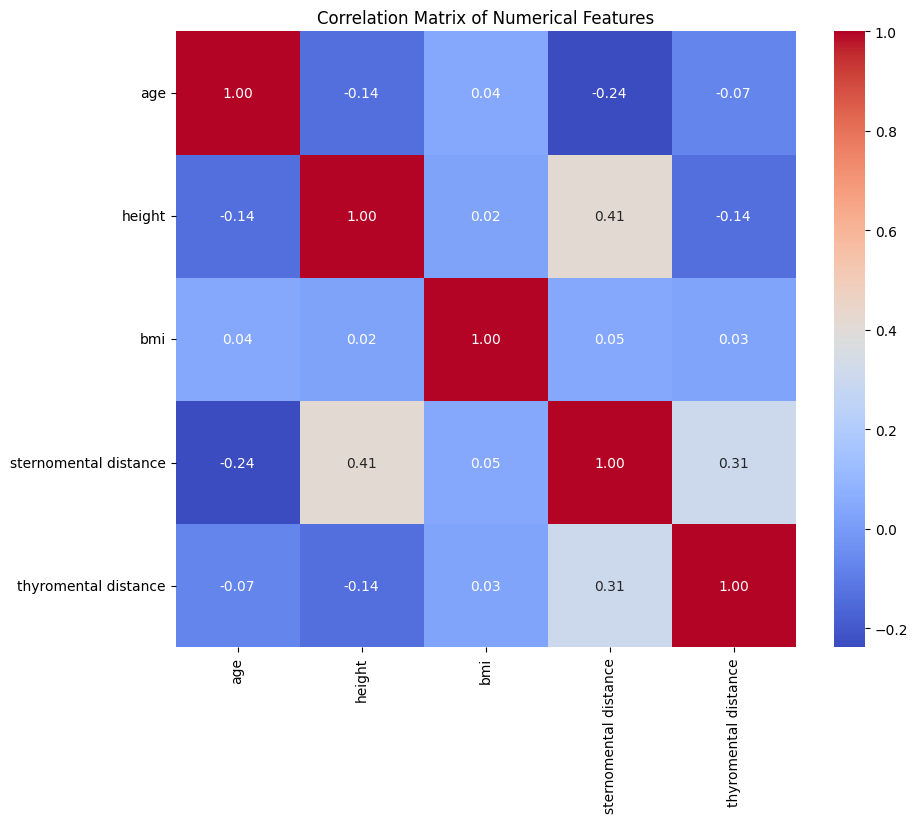

In [13]:
# prompt: Write a program to visualize the correlation in df_noncat features

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_noncat.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [10]:
df.isna().sum()


,0
age,8
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,6
bmi,4
sternomental distance,0
thyromental distance,0


In [ ]:
"""
# 1.3. Missing Data Treatment--amended

# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)

# Dataset Used : df_cat_mde

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_transformed = si_cat.fit_transform(df_cat)
df_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)
df_cat.head()
"""

,sex,buck teeth,edentulous,mallampatti,mouth opening,subluxation of mandible,head and neck movement,cormack lahane
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
1,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0
3,0.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0
4,0.0,0.0,1.0,4.0,1.0,3.0,0.0,4.0


In [ ]:
"""
from sklearn.impute import SimpleImputer

# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency
# Dataset used: df_noncat_mde

# Create a SimpleImputer with the 'most_frequent' strategy
si_noncat = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the data
si_noncat_transformed = si_noncat.fit_transform(df_noncat)
df_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)
df_noncat.head()
"""

"\nfrom sklearn.impute import SimpleImputer\n\n# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency\n# Dataset used: df_noncat_mde\n\n# Create a SimpleImputer with the 'most_frequent' strategy\nsi_noncat = SimpleImputer(missing_values=np.nan, strategy='median')\n\n# Fit and transform the data\nsi_noncat_transformed = si_noncat.fit_transform(df_noncat)\ndf_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)\ndf_noncat.head()\n"

"age", "height", "bmi", "sternomental distance", "thyromental distance"

In [ ]:
"""
df_ppd = df_noncat.join(df_cat)
df_ppd.head()
df_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)
df_ppd.shape
df_ppd.info()
"""

"\ndf_ppd = df_noncat.join(df_cat)\ndf_ppd.head()\ndf_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)\ndf_ppd.shape\ndf_ppd.info()\n"

In [11]:
df_ppd = df

<Axes: xlabel='age'>

Text(0.5, 1.0, 'Age Box Plot')

<Axes: xlabel='height'>

Text(0.5, 1.0, 'Height Box Plot')

<Axes: xlabel='bmi'>

Text(0.5, 1.0, 'BMI Box Plot')

<Axes: xlabel='sternomental distance'>

Text(0.5, 1.0, 'Sternomental Distance Box Plot')

<Axes: xlabel='thyromental distance'>

Text(0.5, 1.0, 'Thyromental Distance Box Plot')

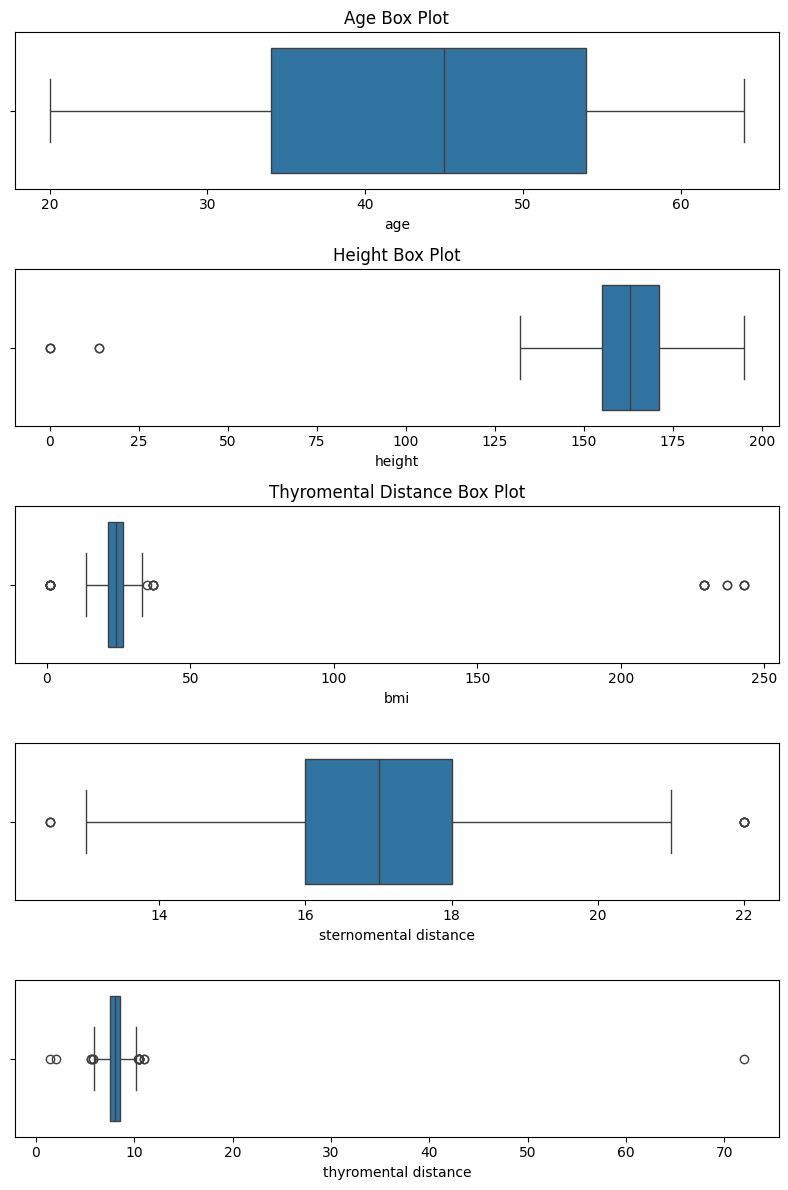

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create separate box plots for the specified columns using Seaborn
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

# Box plot for 'raised_amount_usd'
sns.boxplot(x=df_ppd['age'], ax=axs[0])
axs[0].set_title('Age Box Plot')

# Box plot for 'pre_money_valuation_usd'
sns.boxplot(x=df_ppd['height'], ax=axs[1])
axs[1].set_title('Height Box Plot')

# Box plot for 'post_money_valuation_usd'
sns.boxplot(x=df_ppd['bmi'], ax=axs[2])
axs[2].set_title('BMI Box Plot')

# Box plot for 'post_money_valuation_usd'
sns.boxplot(x=df_ppd['sternomental distance'], ax=axs[3])
axs[2].set_title('Sternomental Distance Box Plot')

# Box plot for 'post_money_valuation_usd'
sns.boxplot(x=df_ppd['thyromental distance'], ax=axs[4])
axs[2].set_title('Thyromental Distance Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
"""
No preprocessing to OHE
"""

'\nNo preprocessing to OHE\n'

# Random Forest

In [ ]:
# Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
X = df_ppd.drop('cormack lahane', axis=1)
y = df_ppd['cormack lahane']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time


# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)
# Accuracy score
rf_classifier.score(X_test, y_test)

RandomForestClassifier(random_state=42)

0.8783068783068783

In [ ]:
# Calculate the train and test scores
train_score = rf_classifier.score(X_train,y_train)
test_score = rf_classifier.score(X_test,y_test)

# Print the train and test scores
print("Train Score {:.2f} & Test Score {:.2f}".format(train_score, test_score))

Train Score 1.00 & Test Score 0.88


In [ ]:
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\n Random Forest Accuracy:", rf_accuracy)


 Random Forest Accuracy: 0.8783068783068783


In [ ]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.88      0.92      0.90       104
           2       0.85      0.69      0.76        16
           3       1.00      0.43      0.60         7

    accuracy                           0.88       189
   macro avg       0.90      0.74      0.79       189
weighted avg       0.88      0.88      0.87       189



In [ ]:
# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance along with feature names
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance"
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                    Feature  Importance
7                       bmi    0.182319
0                       age    0.158043
2                    height    0.146110
9      thyromental distance    0.145175
8     sternomental distance    0.141659
10              mallampatti    0.090721
3   subluxation of mandible    0.032988
5                buck teeth    0.029555
6                edentulous    0.027206
1                       sex    0.026708
4    head and neck movement    0.015258
11            mouth opening    0.004258


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

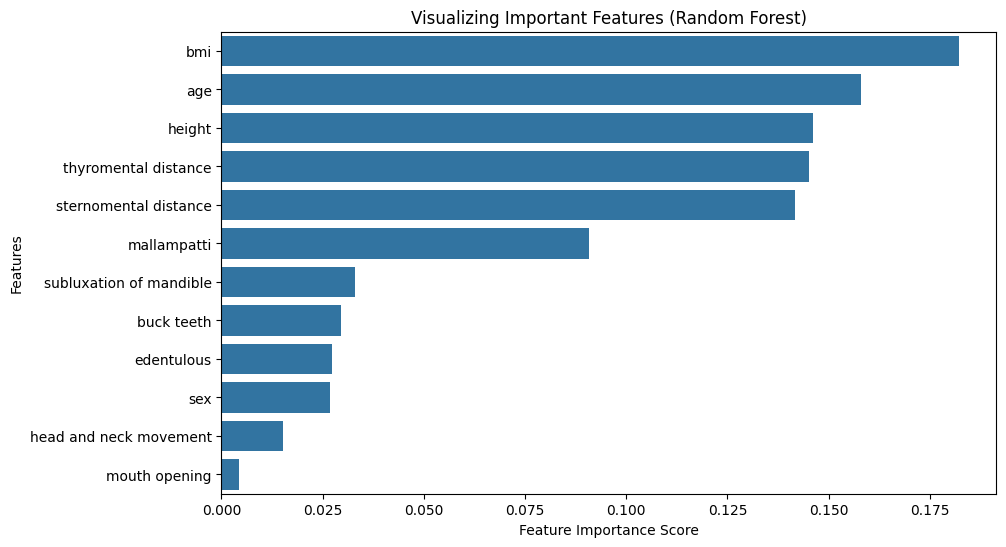

In [ ]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_classifier, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  0.170 +/- 0.022
age          0.128 +/- 0.020
bmi          0.112 +/- 0.019
thyromental distance0.093 +/- 0.014
sternomental distance0.079 +/- 0.012
height       0.077 +/- 0.015
buck teeth   0.045 +/- 0.011
subluxation of mandible0.023 +/- 0.006
edentulous   0.020 +/- 0.006
head and neck movement0.016 +/- 0.007


In [ ]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
from sklearn.inspection import permutation_importance
rt = permutation_importance(rf_classifier, X_train, y_train,
                           n_repeats=40,
                           random_state=0)

In [ ]:
for i in rt.importances_mean.argsort()[::-1]:
    if rt.importances_mean[i] - 2 * rt.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rt.importances_mean[i]:.3f}"
              f" +/- {rt.importances_std[i]:.3f}")

mallampatti  0.152 +/- 0.010
age          0.131 +/- 0.010
bmi          0.105 +/- 0.008
thyromental distance0.082 +/- 0.006
sternomental distance0.053 +/- 0.006
height       0.052 +/- 0.006
buck teeth   0.017 +/- 0.002
sex          0.011 +/- 0.002
subluxation of mandible0.009 +/- 0.002
head and neck movement0.006 +/- 0.002
edentulous   0.003 +/- 0.001


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

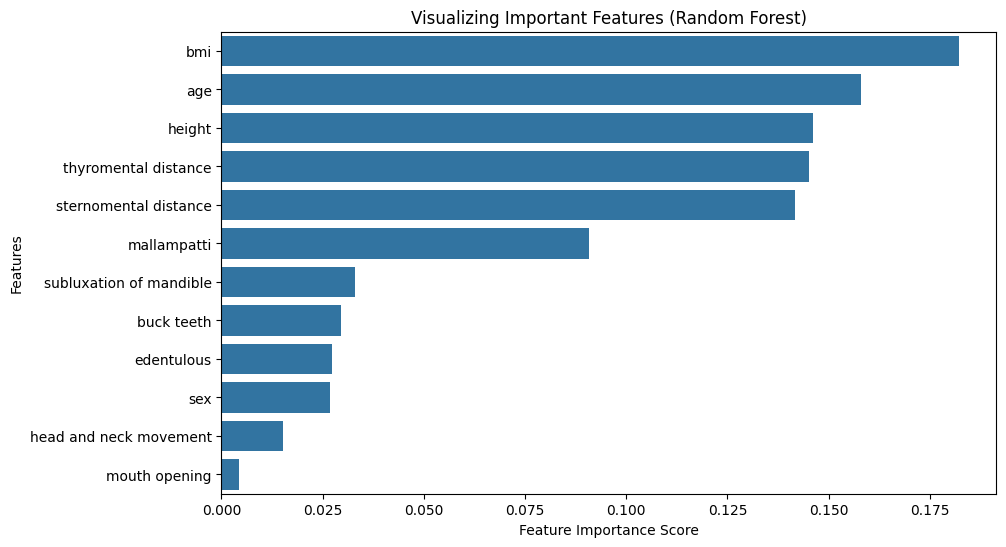

In [ ]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
categorical_features = df_cat.columns[:-1]
hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = categorical_features ,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 ).fit(X_train, y_train)



hist_classifier.score(X_test, y_test)


0.8888888888888888

In [ ]:
scores = cross_val_score(hist_classifier, X, y, cv=5)
scores

array([0.93121693, 0.8994709 , 0.94179894, 0.89417989, 0.91534392])

In [ ]:
X.shape
type(X)

(945, 12)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.inspection import permutation_importance
rh = permutation_importance(hist_classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=0)



In [ ]:
for i in rh.importances_mean.argsort()[::-1]:
    if rh.importances_mean[i] - 2 * rh.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rh.importances_mean[i]:.3f}"
              f" +/- {rh.importances_std[i]:.3f}")

bmi          0.190 +/- 0.026
mallampatti  0.121 +/- 0.022
age          0.119 +/- 0.020
thyromental distance0.109 +/- 0.012
height       0.108 +/- 0.020
sternomental distance0.084 +/- 0.014
buck teeth   0.045 +/- 0.009
subluxation of mandible0.032 +/- 0.005
edentulous   0.014 +/- 0.007


In [ ]:


df.columns

Index(['age', 'sex', 'height', 'subluxation of mandible',
       'head and neck movement', 'buck teeth', 'edentulous', 'bmi',
       'sternomental distance', 'thyromental distance', 'mallampatti',
       'mouth opening', 'cormack lahane'],
      dtype='object')

In [ ]:
y= pd.DataFrame(y, columns = ['cormack lahane'])
y

,cormack lahane
0,1
1,0
2,2
3,1
4,3
...,...
940,1
941,1
942,0
943,1


In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = categorical_features ,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9153439153439153
fold: 2
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9206349206349206
fold: 3
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.8888888888888888
fold: 4
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.873015873015873
fold: 5
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.8994708994708994
Overall Accuracy: 0.8994708994708993
CPU times: user 14.1 s, sys: 554 ms, total: 14.6 s
Wall time: 14.8 s


In [ ]:

%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

clf = ExtraTreesClassifier(n_estimators=100,
                           max_depth=None,
                           min_samples_split=2)



start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    clf.fit(X_train, y_train)
    print("Accuracy:", clf.score(X_test, y_test))
    list_accu_stratified.append(clf.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9365079365079365
fold: 2
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9206349206349206
fold: 3
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9206349206349206
fold: 4
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9153439153439153
fold: 5
X_train shape: (756, 12) y_train shape: (756, 1)
X_test shape: (189, 12) y_test shape: (189, 1)
Accuracy: 0.9047619047619048
Overall Accuracy: 0.9195767195767196
CPU times: user 1.9 s, sys: 11.2 ms, total: 1.91 s
Wall time: 3.45 s


In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(extra_classifier, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  0.170 +/- 0.022
age          0.128 +/- 0.020
bmi          0.112 +/- 0.019
thyromental distance0.093 +/- 0.014
sternomental distance0.079 +/- 0.012
height       0.077 +/- 0.015
buck teeth   0.045 +/- 0.011
subluxation of mandible0.023 +/- 0.006
edentulous   0.020 +/- 0.006
head and neck movement0.016 +/- 0.007


In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
bst = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
xgb_preds = bst.predict(X_test)
# Calculate the accuracy of the classifier
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\n XGBoost:", rf_accuracy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


 XGBoost: 0.8624338624338624


In [ ]:
###########